# Cartpole using Q-Learning

In [1]:
'''
Inspired from article - https://medium.com/@tuzzer/cart-pole-balancing-with-q-learning-b54c6068d947
'''
import numpy as np
import gym
import math
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### Initial play

In [ ]:
env = gym.make('CartPole-v0')
env.reset()

for _ in range(1000):
    env.render()
    action = env.action_space.sample()
    env.step(action)

### Q-learning

In [3]:

final_rewards = []
time_req  = []

class Qlearn:
    
    def __init__(self, buckets=(1, 1, 6, 12,), n_episodes=1000, n_win_ticks=195, min_alpha=0.1, min_epsilon=0.1,
                 gamma=1.0, ada_divisor=25, max_env_steps=None, quiet=False, monitor=False):
        
        self.buckets = buckets
        self.n_episodes = n_episodes
        self.n_win_ticks = n_win_ticks
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon
        
        self.gamma = gamma
        self.ada_divisor = ada_divisor
        self.quiet = quiet
        
        self.env = gym.make('CartPole-v0')
        
        if max_env_steps is not None:
            self.env._max_episode_steps = max_env_steps
            
        if monitor:
            self.env = gym.wrappers.Monitor(self.env, 'tmp/cartpole-1', force=True)
                
        self.Q = np.zeros(self.buckets + (self.env.action_space.n,)) #Initialize Q-table
        
    
    def discretize(self, obs):
        
        upper_bounds = [self.env.observation_space.high[0], 0.5, self.env.observation_space.high[2], math.radians(50)]
        lower_bounds = [self.env.observation_space.low[0], -0.5, self.env.observation_space.low[2], -math.radians(50)]
        
        ratios = [(obs[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))]
        
        new_obs = [int(round((self.buckets[i] - 1) * ratios[i])) for i in range(len(obs))]
        new_obs = [min(self.buckets[i] - 1, max(0, new_obs[i])) for i in range(len(obs))]
        
        return tuple(new_obs)
            
    def choose_action(self, state, epsilon):
        
        return self.env.action_space.sample() if (np.random.random() <= epsilon) else np.argmax(self.Q[state])
    
    def update_q(self, state_old, action, reward, state_new, alpha):
        
        self.Q[state_old][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])
        
    def get_epsilon(self, t):
        
        return max(self.min_epsilon, min(1, 1.0 - math.log10((t + 1) / self.ada_divisor)))
    
    def get_alpha(self, t):
        
        return max(self.min_alpha, min(1.0, 1.0 - math.log10((t + 1) / self.ada_divisor)))
    
    def run(self):
        
        scores = deque(maxlen=100)
        
        for e in range(self.n_episodes):
            
            current_state = self.discretize(self.env.reset())
            
            alpha = self.get_alpha(e)
            epsilon = self.get_epsilon(e)
            done = False
            i = 0
            
            for time in range(500):
                
                self.env.render()
                action = self.choose_action(current_state, epsilon)
                obs, reward, done, _ = self.env.step(action)
                new_state = self.discretize(obs)
                self.update_q(current_state, action, reward, new_state, alpha)
                current_state = new_state
                i += reward
                
                if done:
                    print('Episode:{}/{} finished with reward:{}'.format(e, self.n_episodes, time))
                    break
                
            scores.append(i)
            final_rewards.append(i)
            
            mean_score = np.mean(scores)
            
            if mean_score >= self.n_win_ticks and e >= 100:
                if not self.quiet: print('\nRan {} episodes. Solved after {} episodes'.format(e, e - 100))
                return e - 100
            
            if e % 100 == 0 and e >= 100:
                print('\n[Episode {}] - Mean time over last 100 episodes was {} ticks.'.format(e, mean_score))

        if not self.quiet: print('\nDid not solve after {} episodes'.format(e))
        return e
            
if __name__ == "__main__":
    qlearn = Qlearn()
    qlearn.run()    
                

Episode:0/1000 finished with reward:18
Episode:1/1000 finished with reward:22
Episode:2/1000 finished with reward:9
Episode:3/1000 finished with reward:31
Episode:4/1000 finished with reward:13
Episode:5/1000 finished with reward:35
Episode:6/1000 finished with reward:11
Episode:7/1000 finished with reward:18
Episode:8/1000 finished with reward:10
Episode:9/1000 finished with reward:9
Episode:10/1000 finished with reward:22
Episode:11/1000 finished with reward:37
Episode:12/1000 finished with reward:16
Episode:13/1000 finished with reward:12
Episode:14/1000 finished with reward:20
Episode:15/1000 finished with reward:9
Episode:16/1000 finished with reward:24
Episode:17/1000 finished with reward:21
Episode:18/1000 finished with reward:42
Episode:19/1000 finished with reward:22
Episode:20/1000 finished with reward:19
Episode:21/1000 finished with reward:16
Episode:22/1000 finished with reward:19
Episode:23/1000 finished with reward:13
Episode:24/1000 finished with reward:19
Episode:25/10

Episode:200/1000 finished with reward:199

[Episode 200] - Mean time over last 100 episodes was 142.17 ticks.
Episode:201/1000 finished with reward:199
Episode:202/1000 finished with reward:199
Episode:203/1000 finished with reward:199
Episode:204/1000 finished with reward:199
Episode:205/1000 finished with reward:199
Episode:206/1000 finished with reward:199
Episode:207/1000 finished with reward:199
Episode:208/1000 finished with reward:199
Episode:209/1000 finished with reward:199
Episode:210/1000 finished with reward:199
Episode:211/1000 finished with reward:199
Episode:212/1000 finished with reward:199
Episode:213/1000 finished with reward:199
Episode:214/1000 finished with reward:199
Episode:215/1000 finished with reward:199
Episode:216/1000 finished with reward:199
Episode:217/1000 finished with reward:199
Episode:218/1000 finished with reward:199
Episode:219/1000 finished with reward:199
Episode:220/1000 finished with reward:199
Episode:221/1000 finished with reward:199
Episode:

Text(0,0.5,'Rewards')

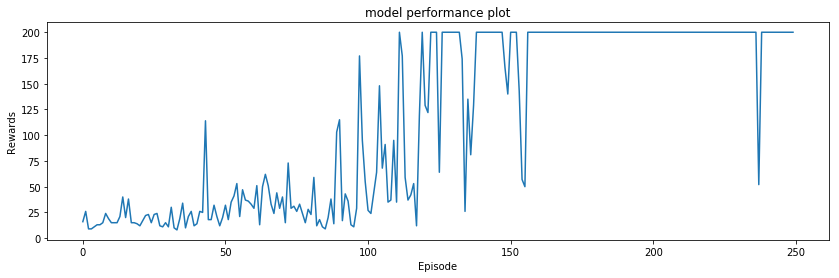

In [15]:
plt.figure(figsize=(14, 4))
plt.plot(final_rewards)
plt.title('model performance plot')
plt.xlabel('Episode')
plt.ylabel('Rewards')